In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Titanic dataset

In [95]:
df = pd.read_csv('/content/tested.csv')

In [96]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Age          331 non-null    float64
 4   SibSp        331 non-null    int64  
 5   Parch        331 non-null    int64  
 6   Fare         331 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 20.7 KB


1. Survival Distribution:

Bar plot to show the distribution of survivors and non-survivors.


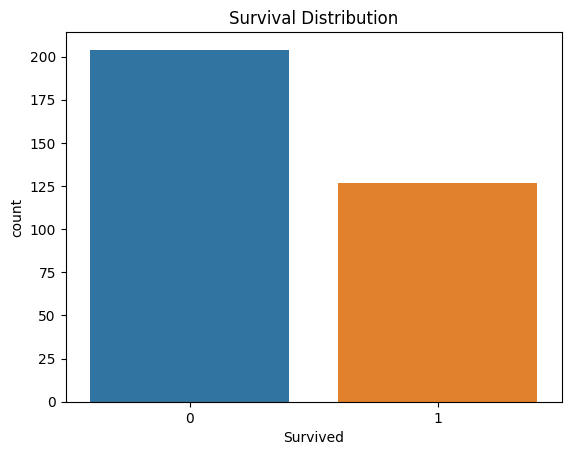

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

2. Survival by Class :

A grouped bar plot to show survival counts based on passenger class.


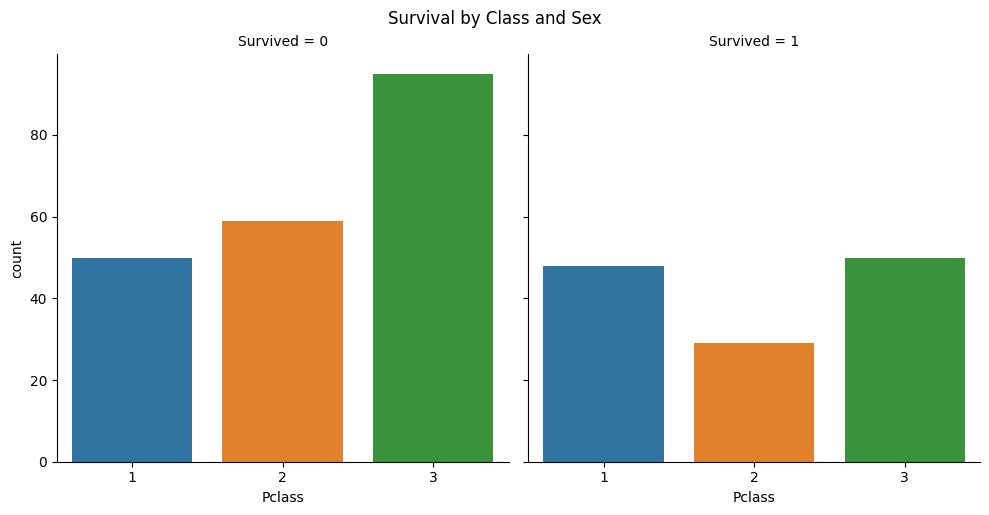

In [148]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=df)
plt.suptitle('Survival by Class', y=1.02)
plt.show()

3. Age Distribution:

Histogram to show the distribution of passenger ages.

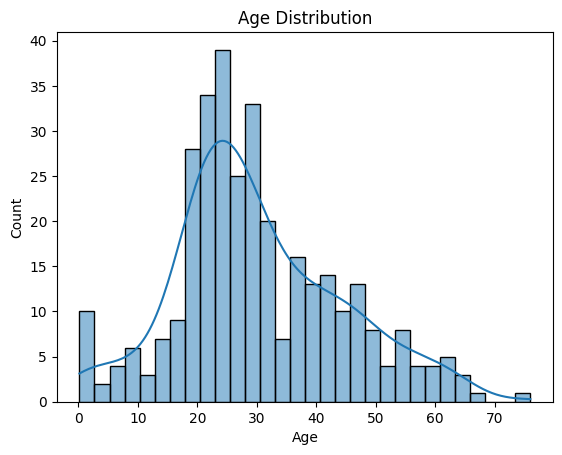

In [151]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

4. Survival by Age:

Box plot to show the distribution of ages for survivors and non-survivors.

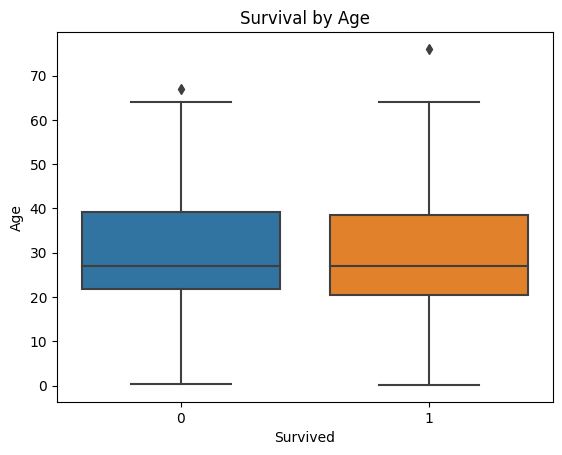

In [154]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age')
plt.show()

5. Correlation Heatmap:

Heatmap to visualize the correlation between numerical features.

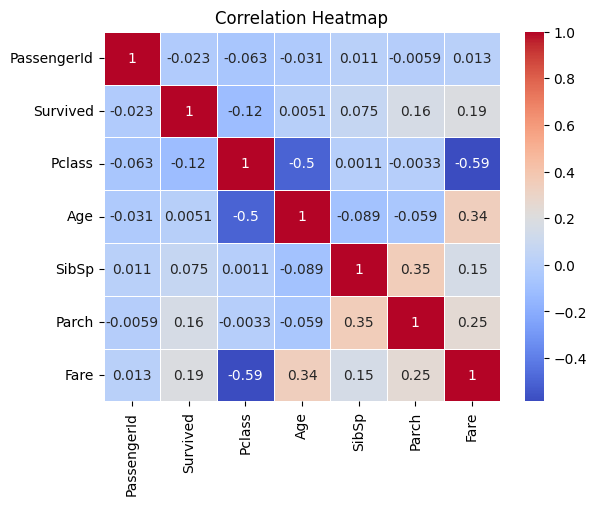

In [156]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

6. Fare Distribution:

Box plot to show the distribution of passenger fares.

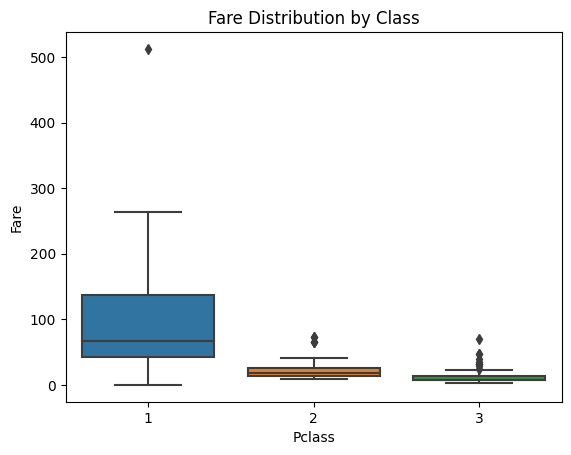

In [157]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.show()

In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
# Drop non-numeric columns (e.g., 'Name', 'Ticket', 'Cabin')
df = df.select_dtypes(include=[np.number])

# Drop rows with missing values
df.dropna(inplace=True)

In [106]:
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875


In [107]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, df.columns != 'survived']
y = df['Survived']

In [108]:
X.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000


In [109]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Create a logistic regression model
logreg = LogisticRegression()

In [111]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [113]:
# Make predictions
y_pred = logreg.predict(X_test)

In [114]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [115]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[45  0]
 [ 0 22]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



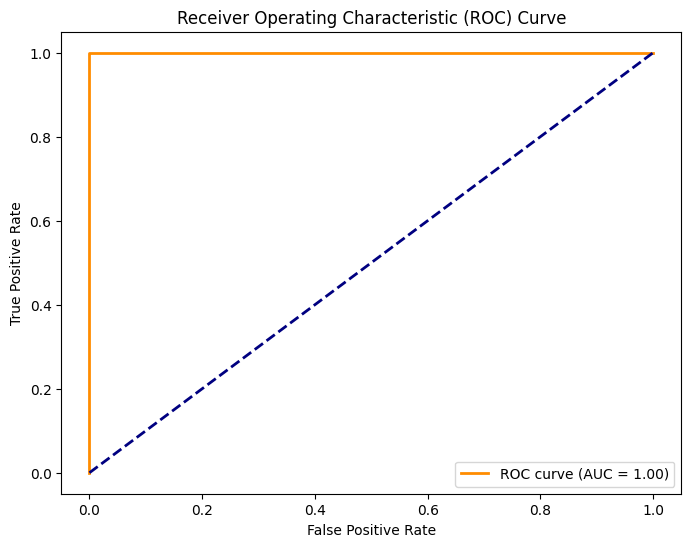

In [117]:
# Plot ROC curve
y_probs = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [123]:
df_test = pd.read_csv('/content/train (5).csv')
df_test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [136]:
df_test_subset = df_test[['PassengerId','Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_test_subset.isnull().sum()
# Drop rows with missing values
df_test_subset.dropna(inplace=True)

<ipython-input-136-f9f0dbc07a2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_subset.dropna(inplace=True)


In [137]:
# Make predictions on the subset of the testing set
predictions = logreg.predict(df_test_subset)
print('Predictions:', predictions)

Predictions: [0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 0 0 1 0 0